# <center>Flight Delay Prediction- Deep Learning</center>

In this Jupyter file, we enhanced our simple Deep Neural Network (DNN) model for predicting flight delays by incorporating dropout layers. We continued to utilize the two optimizers: Adam and Stochastic Gradient Descent (SGD). Initially, the model was trained using the original dataset, with all 25 features (X). Subsequently, we retrained the model using a reduced set of 15 features obtained through Principal Component Analysis (PCA) (X_pca). Both training runs used the same target label class (y).

The files X, X_pca, and y store the processed data, all saved from the "flightdelay_ML" Jupyter file. This augmentation in the model aims to enhance its robustness and predictive capabilities.




## Loading the neccessary libraries and packages

In [1]:
# pandas used for data manipulation and analysis, providing data structures like DataFrames for working with tabular data. 
import pandas as pd  

# numpy is numerical Python, the fundamental package for scientific computing in Python.  
import numpy as np    

# seaborn is a data visualization library based on Matplotlib that designed to create informative and attractive statistical graphics.
import seaborn as sns

# Extends the capabilities of pandas to allow for working with geospatial data.
import geopandas as gpd

# Creating interractive graphs.
import plotly.express as px
import plotly.graph_objs as go

# A common library for creating static, animated, and interactive visualizations in Python.
import matplotlib                    # pyplot module

# Pretty-print lists, tuples, & dictionaries recursively in a human-readable format.
import pprint                        

# Providing a high level interface for creating various types of plots and charts.
import matplotlib.pyplot as plt


In [2]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint       

Pretty printing has been turned OFF


In [3]:
#ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# retina quality: to better display the plots. Any display with retina resolution will make the figures look better
# if your monitor's resolution is sub-retina than the improvement will be less noticeable [2].
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

## Exploratory Data Analysis(EDA)¶

#### Reading Data from Files

In [5]:
# Read the dataset from the CSV file
X = pd.read_csv('features.csv')                   # Features X
X_pca = pd.read_csv('features_pca.csv')           # Features generated by PCA
y = pd.read_csv('labels.csv')                     # Target-"Label class"  

#### Display the shape of X, X_pca, y

In [6]:
print(X.shape, X_pca.shape, y.shape)

(6489062, 25) (6489062, 15) (6489062, 1)


* X contains all the features which are 25.
* X_pca contain the features generated by PCA which are 15.
* y is the class label 

####  Display X, X_apc, y

In [7]:
X = X.values
print(X)

[[0.         1.         0.16666667 ... 0.         0.6        0.08614565]
 [0.         1.         0.11111111 ... 0.         0.6        0.08614565]
 [0.         1.         0.05555556 ... 0.         0.6        0.08614565]
 ...
 [1.         1.         0.83333333 ... 0.         0.752      0.45026643]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]]


In [8]:
X_pca = X_pca.values
print(X_pca)

[[-0.55507791 -0.18304123  0.17331148 ...  0.06310917  0.01919039
  -0.06740408]
 [-0.34403764 -0.03961176  0.71717081 ...  0.11566046 -0.03808954
   0.10132898]
 [-0.39863296 -0.04372888  0.72448134 ...  0.14249348 -0.10179438
   0.06557709]
 ...
 [ 0.71013878 -0.30248506  0.34229309 ...  0.02197816  0.15952869
  -0.08903957]
 [ 0.71053374 -0.29301182  0.32452999 ...  0.02493397  0.15989118
  -0.08416036]
 [ 0.72068105 -0.2945889   0.32581268 ...  0.01881651  0.17286748
  -0.07937227]]


In [9]:
y = (y.values).reshape(-1)
# y = y.reshape(-1)
print(y)

[0 0 0 ... 0 0 1]


In [10]:
print(X.shape, X_pca.shape, y.shape)

(6489062, 25) (6489062, 15) (6489062,)


We are ready to build a deep learning models

## Deep Learning:

In [11]:
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

#### Split the data into train set and test set

Before deploying a deep learning model in an industry setting, it's crucial to ensure that the model generalizes effectively to unseen test data, thereby avoiding overfitting. Overfitting is a common concept in data science, indicating that a model has learned the training data too well but struggles with new, unseen data. To assess whether overfitting is occurring, we typically split the dataset into two parts: a training set and a test set. 

- Training Set (X_train, y_train) - 70% ( 4542343 samples): This portion is used to train the ANN model.
- Testing Set  (X_test, y_test)   - 30% ( 1946719 samples): This portion is reserved for evaluating and assessing the model's performance.

The Scikit-Learn library provides a convenient built-in function called train_test_split to facilitate this data splitting process. Let's write a function to split the dataset.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    # test set= 20% and the random seed=42
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)     

(4542343, 25) (4542343,) (1946719, 25) (1946719,)


Using random_state=42 (or any integer) is a way to set the random seed for the randomization process, ensuring the reproducibility of results. In simpler terms, employing the same random_state value will consistently produce the same data split each time the code is run, resulting in identical outcomes. Reproducibility is of significant importance in data science and various other domains. [https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79]

## Construct the DNN model

### 1. Using the original dataset that contains 6489062 rows and 26 columns.

#### First model

<b>Simple Feedforward Neural Network</b> is a fundamental type of artificial neural network used in supervised learning. In feedforward neural networks, data moves in a single direction: from the input layer, through any hidden layers, and ultimately to the output layer, enforcing a strict forward flow. Each layer comprises interconnected nodes, commonly known as neurons. These neurons receive inputs from the preceding layer, process the information, and transmit the results to the subsequent layer. Activation functions are applied to these inputs at each node, introducing non-linearity to the model. 

In [13]:
# Define the model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=25))  # Input layer with 128 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


This neural network model initiates with an input layer comprising 25 neurons representing features, employing Rectified Linear Unit (ReLU) activation. To reduce the overfitting risk, dropout layers with a 0.5 dropout rate follow the input and subsequent hidden layer, which consists of 32 neurons using ReLU activation. The last layer, designed for binary classification tasks, features a single neuron with a sigmoid activation function. 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


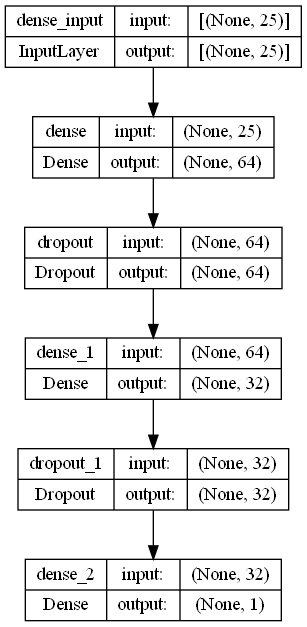

In [15]:
#Use the Keras Sequential Architecture
plot_model(model, show_shapes=True, show_layer_names=True)

#### Using <b>Adam</b> optimizer and <b>binary_crossentropy</b> loss

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Optimizer= 'adam' because Adam is a default choice for many deep learning tasks because it combines the benefits of both AdaGrad and RMSProp like faster convergence, and effective parameter updates, enhancing training efficiency.
- loss = 'binary_crossentropy'is an ideal choice for binary classification.
- metrics='accuracy' as accuracy it is a crucial measure for classification tasks to assess the model's ability to predict the correct class. 

In [17]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
141949/141949 - 452s - loss: 0.4630 - accuracy: 0.8110 - val_loss: 0.4549 - val_accuracy: 0.8122 - 452s/epoch - 3ms/step
Epoch 2/10
141949/141949 - 441s - loss: 0.4595 - accuracy: 0.8116 - val_loss: 0.4532 - val_accuracy: 0.8119 - 441s/epoch - 3ms/step
Epoch 3/10
141949/141949 - 443s - loss: 0.4586 - accuracy: 0.8118 - val_loss: 0.4523 - val_accuracy: 0.8125 - 443s/epoch - 3ms/step
Epoch 4/10
141949/141949 - 442s - loss: 0.4580 - accuracy: 0.8119 - val_loss: 0.4512 - val_accuracy: 0.8130 - 442s/epoch - 3ms/step
Epoch 5/10
141949/141949 - 415s - loss: 0.4575 - accuracy: 0.8120 - val_loss: 0.4518 - val_accuracy: 0.8128 - 415s/epoch - 3ms/step
Epoch 6/10
141949/141949 - 346s - loss: 0.4573 - accuracy: 0.8121 - val_loss: 0.4507 - val_accuracy: 0.8130 - 346s/epoch - 2ms/step
Epoch 7/10
141949/141949 - 332s - loss: 0.4570 - accuracy: 0.8122 - val_loss: 0.4510 - val_accuracy: 0.8128 - 332s/epoch - 2ms/step
Epoch 8/10
141949/141949 - 296s - loss: 0.4568 - accuracy: 0.8123 - val_loss

<b>Epoch:</b> is a one complete pass through the entire training dataset. During one epoch, the neural network's parameters (weights and biases) are updated based on the gradients of the loss function, computed on the entire training dataset.
<b>Loss</b> The loss metric represents the error between predicted and actual outcomes.
<b>Accuracy</b> The accuracy indicates the proportion of correct predictions.


The previous result displays the performance of a neural network model trained for flight delay prediction over ten epochs. Each epoch records the loss and accuracy for both the training and validation sets. The accuracy shows a consistent improvement while the loss decreases progressively, indicating the model's ability to learn from the training data and generalize well to the validation set.  

Let's create visual representations illustrating the loss and accuracy for both the training and validation sets.

In [18]:
def accuracy_loss_plot(history):
    '''
    To plot the model accuracy and loss for the training and validation set over epochs.
    '''
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], fontsize=12)
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'],fontsize=12)
    plt.show()

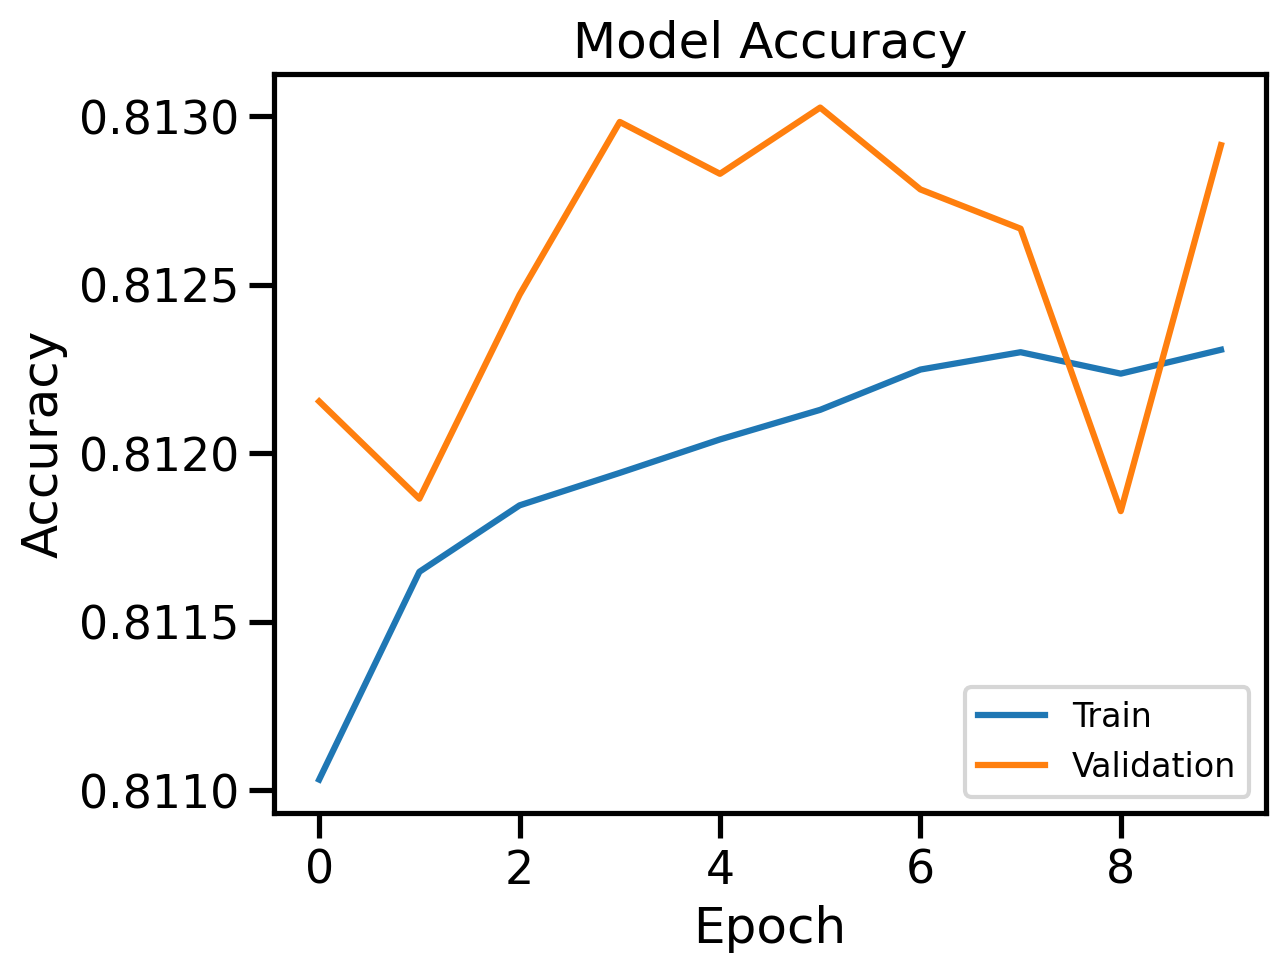

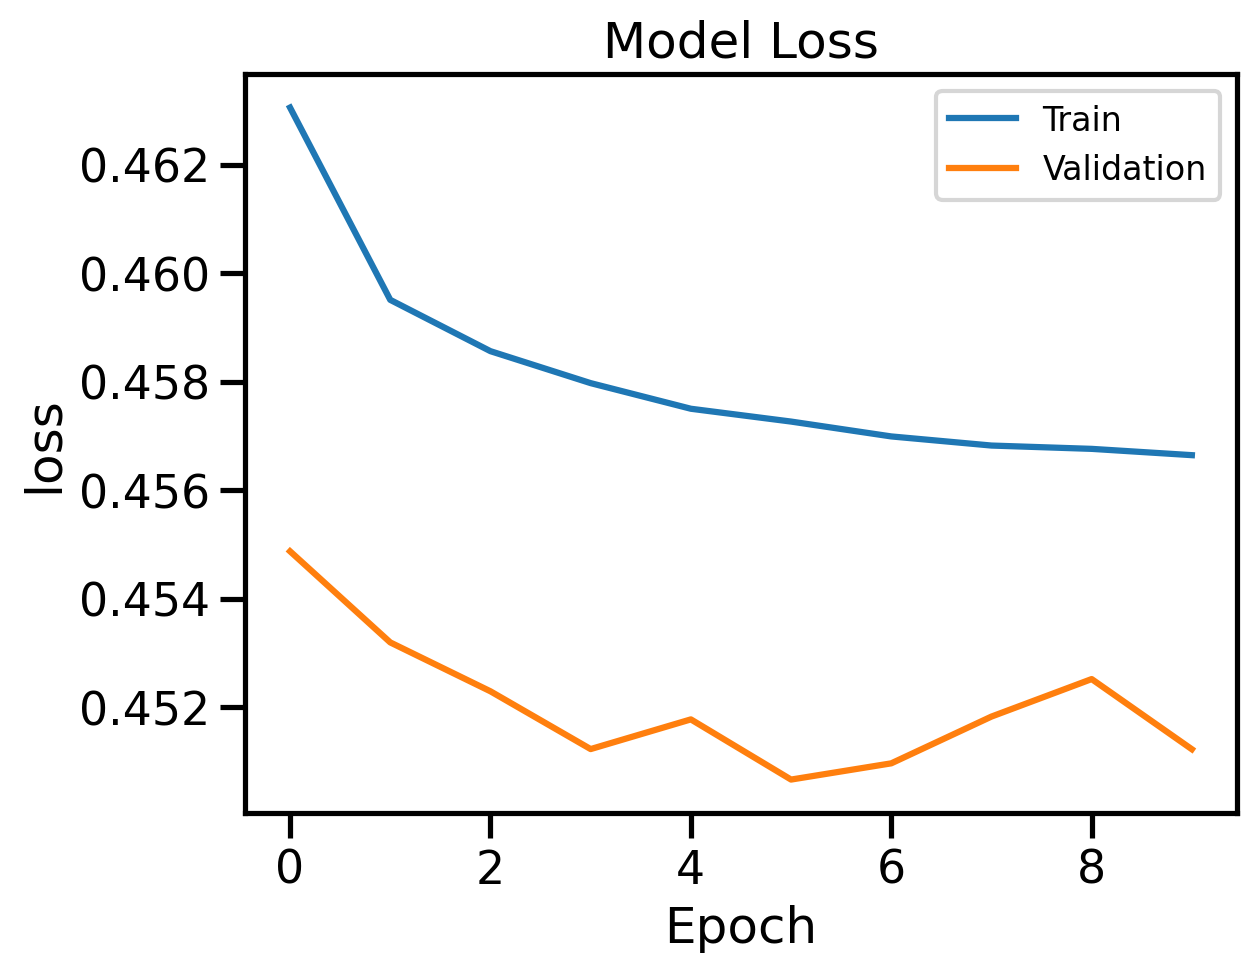

In [19]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history) 

The provided figures show the performance of the ANN model designed for binary classification of flight delays (1 if delay exceeds 15 minutes, 0 otherwise). The model demonstrates consistent improvement in accuracy and reduction in loss across the 10 epochs.

The model consistently improved in accuracy and reduced its loss during both training and validation. Initially, training accuracy was 81.11%, reaching 81.21% by the tenth epoch. Validation accuracy started at 81.15% and reached 81.17%. Similarly, training loss decreased from 0.4627 to 0.4569, and validation loss decreased from 0.4552 to 0.4537.

Remarkably, throughout the epochs, validation accuracy line is upper the training accuracy line, and validation loss remained lower than training loss. This suggests the validation dataset might be easier for the model to predict, possibly indicating overfitting. Overfitting means the model overly learns the training data, hindering its ability to generalize to new data. 





<br>

#### Using <b>SGD</b> optimizer and <b>binary_crossentropy</b> loss

Let's change the optimizer to <b>Stochastic Gradient Descent (SGD)</b>. SGD is is a basic optimization algorithm used in training machine learning models. 

In [20]:
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_SGD = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
141949/141949 - 204s - loss: 0.4550 - accuracy: 0.8125 - val_loss: 0.4493 - val_accuracy: 0.8135 - 204s/epoch - 1ms/step
Epoch 2/10
141949/141949 - 203s - loss: 0.4549 - accuracy: 0.8125 - val_loss: 0.4503 - val_accuracy: 0.8130 - 203s/epoch - 1ms/step
Epoch 3/10
141949/141949 - 203s - loss: 0.4547 - accuracy: 0.8126 - val_loss: 0.4484 - val_accuracy: 0.8137 - 203s/epoch - 1ms/step
Epoch 4/10
141949/141949 - 203s - loss: 0.4548 - accuracy: 0.8125 - val_loss: 0.4496 - val_accuracy: 0.8134 - 203s/epoch - 1ms/step
Epoch 5/10
141949/141949 - 204s - loss: 0.4546 - accuracy: 0.8125 - val_loss: 0.4498 - val_accuracy: 0.8134 - 204s/epoch - 1ms/step
Epoch 6/10
141949/141949 - 203s - loss: 0.4547 - accuracy: 0.8125 - val_loss: 0.4508 - val_accuracy: 0.8134 - 203s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 201s - loss: 0.4546 - accuracy: 0.8126 - val_loss: 0.4498 - val_accuracy: 0.8132 - 201s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 202s - loss: 0.4545 - accuracy: 0.8126 - val_loss

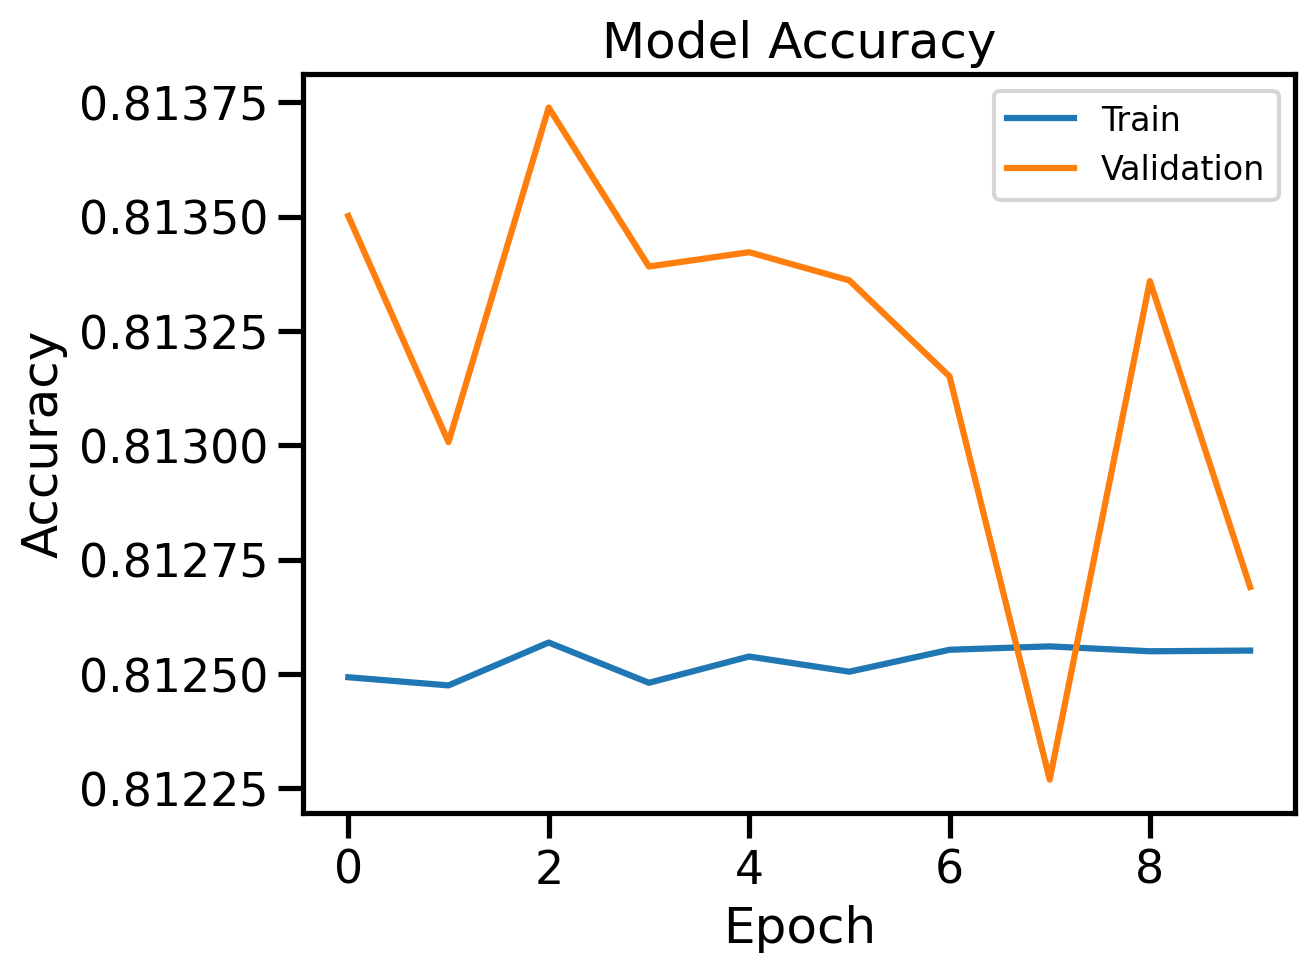

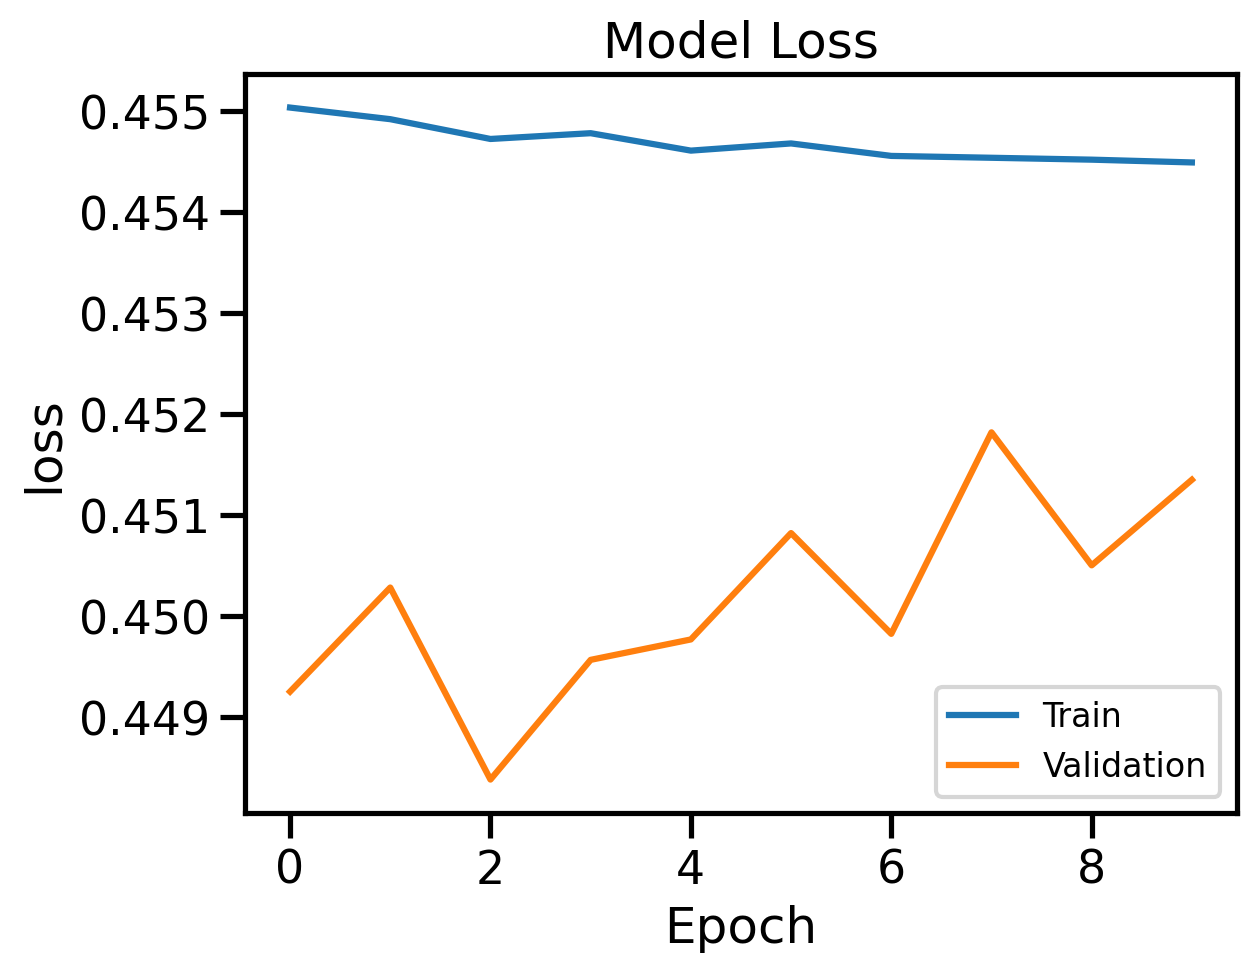

In [22]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_SGD) 

With the SGD optimizer, during the ten training epochs, the model demonstrated a steady enhancement in accuracy and reduction in loss. In the first epoch, training accuracy stood at 81.23%, with validation accuracy slightly higher at 81.30%. As training progressed, accuracy improved further, reaching 81.24% by the tenth epoch, maintaining a consistent level in validation accuracy. Correspondingly, training loss in the initial epoch was 0.4554, and validation loss was 0.4490, both gradually decreasing. By the tenth epoch, training loss reduced to 0.4549 and validation loss to 0.4496. Notably, throughout the training, validation accuracy consistently surpassed training accuracy, and validation loss remained lower, hinting at the model potentially finding the validation dataset easier to predict. Overfitting also detected.

<br>

### 2. Using the reduced dataset generated by PCA that contains 6489062 rows and 15 columns.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1024      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


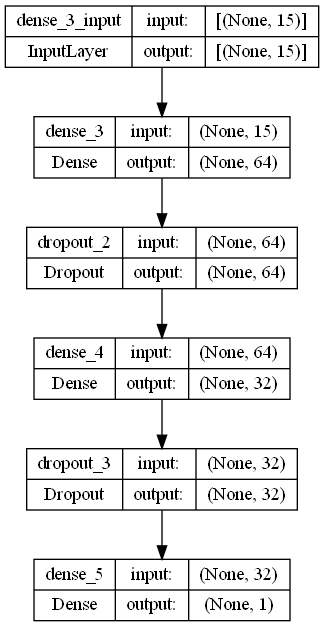

In [23]:
# Define the model
model1 = Sequential()
# Add layers to the model
model1.add(Dense(64, activation='relu', input_dim = 15))  
model1.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model1.add(Dense(32, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model1.add(Dropout(0.5))  # Dropout layer
model1.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification 

model1.summary()
#Use the Keras Sequential Architecture
plot_model(model1, show_shapes=True, show_layer_names=True)

In [25]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42) 
print(X_train_pca.shape, y_train_pca.shape, X_test_pca.shape, y_test_pca.shape)

(4542343, 15) (4542343,) (1946719, 15) (1946719,)


In [26]:
# Compile the model
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_adam_pca = model1.fit(X_train_pca, y_train_pca, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test_pca), verbose=2) 


Epoch 1/10
141949/141949 - 243s - loss: 0.4654 - accuracy: 0.8108 - val_loss: 0.4602 - val_accuracy: 0.8107 - 243s/epoch - 2ms/step
Epoch 2/10
141949/141949 - 283s - loss: 0.4636 - accuracy: 0.8108 - val_loss: 0.4593 - val_accuracy: 0.8107 - 283s/epoch - 2ms/step
Epoch 3/10
141949/141949 - 262s - loss: 0.4633 - accuracy: 0.8107 - val_loss: 0.4593 - val_accuracy: 0.8107 - 262s/epoch - 2ms/step
Epoch 4/10
141949/141949 - 213s - loss: 0.4633 - accuracy: 0.8107 - val_loss: 0.4579 - val_accuracy: 0.8108 - 213s/epoch - 2ms/step
Epoch 5/10
141949/141949 - 1379s - loss: 0.4632 - accuracy: 0.8107 - val_loss: 0.4586 - val_accuracy: 0.8107 - 1379s/epoch - 10ms/step
Epoch 6/10
141949/141949 - 211s - loss: 0.4631 - accuracy: 0.8107 - val_loss: 0.4587 - val_accuracy: 0.8107 - 211s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 213s - loss: 0.4630 - accuracy: 0.8107 - val_loss: 0.4582 - val_accuracy: 0.8107 - 213s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 208s - loss: 0.4629 - accuracy: 0.8107 - val_l

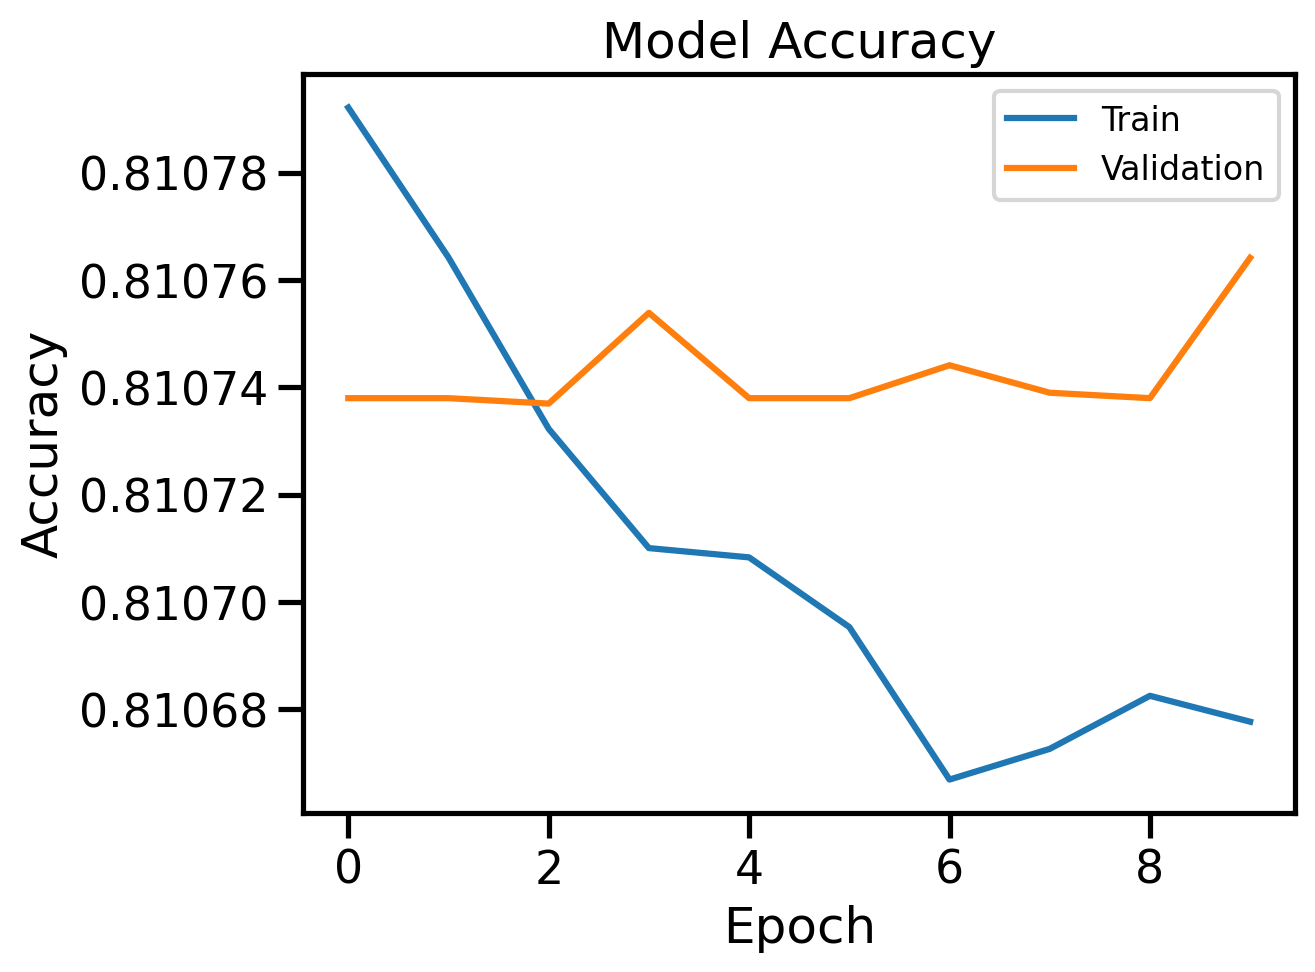

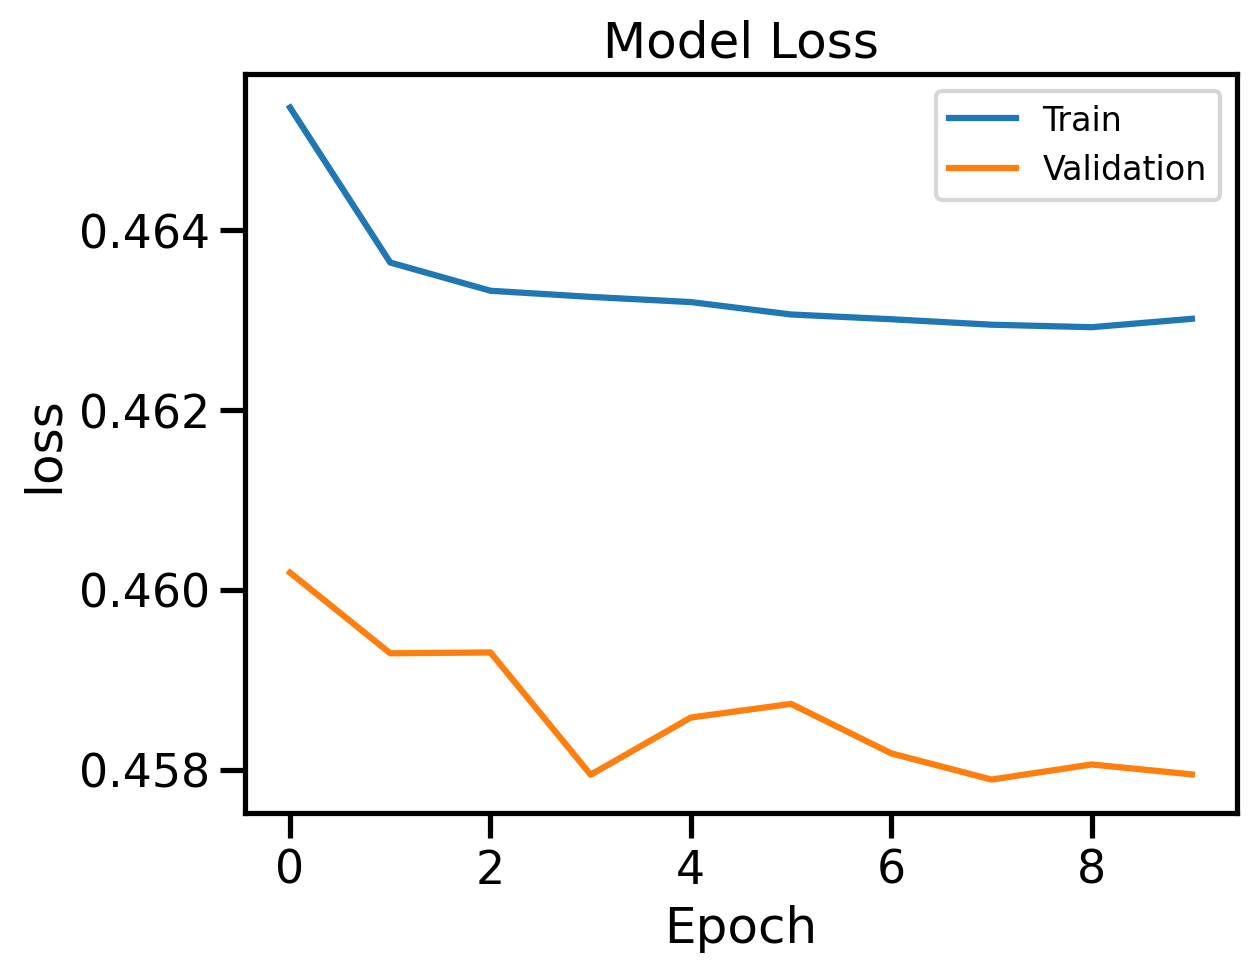

In [27]:
 # Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_adam_pca) 

The validation accuracy line indicates that the model might not have adequate capacity to handle the complexity present in the dataset

Epoch 1/10
141949/141949 - 201s - loss: 0.4625 - accuracy: 0.8107 - val_loss: 0.4575 - val_accuracy: 0.8107 - 201s/epoch - 1ms/step
Epoch 2/10
141949/141949 - 199s - loss: 0.4622 - accuracy: 0.8108 - val_loss: 0.4602 - val_accuracy: 0.8107 - 199s/epoch - 1ms/step
Epoch 3/10
141949/141949 - 205s - loss: 0.4621 - accuracy: 0.8107 - val_loss: 0.4578 - val_accuracy: 0.8107 - 205s/epoch - 1ms/step
Epoch 4/10
141949/141949 - 202s - loss: 0.4621 - accuracy: 0.8107 - val_loss: 0.4577 - val_accuracy: 0.8107 - 202s/epoch - 1ms/step
Epoch 5/10
141949/141949 - 201s - loss: 0.4620 - accuracy: 0.8107 - val_loss: 0.4577 - val_accuracy: 0.8107 - 201s/epoch - 1ms/step
Epoch 6/10
141949/141949 - 200s - loss: 0.4620 - accuracy: 0.8107 - val_loss: 0.4575 - val_accuracy: 0.8107 - 200s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 201s - loss: 0.4619 - accuracy: 0.8107 - val_loss: 0.4583 - val_accuracy: 0.8107 - 201s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 198s - loss: 0.4619 - accuracy: 0.8107 - val_loss

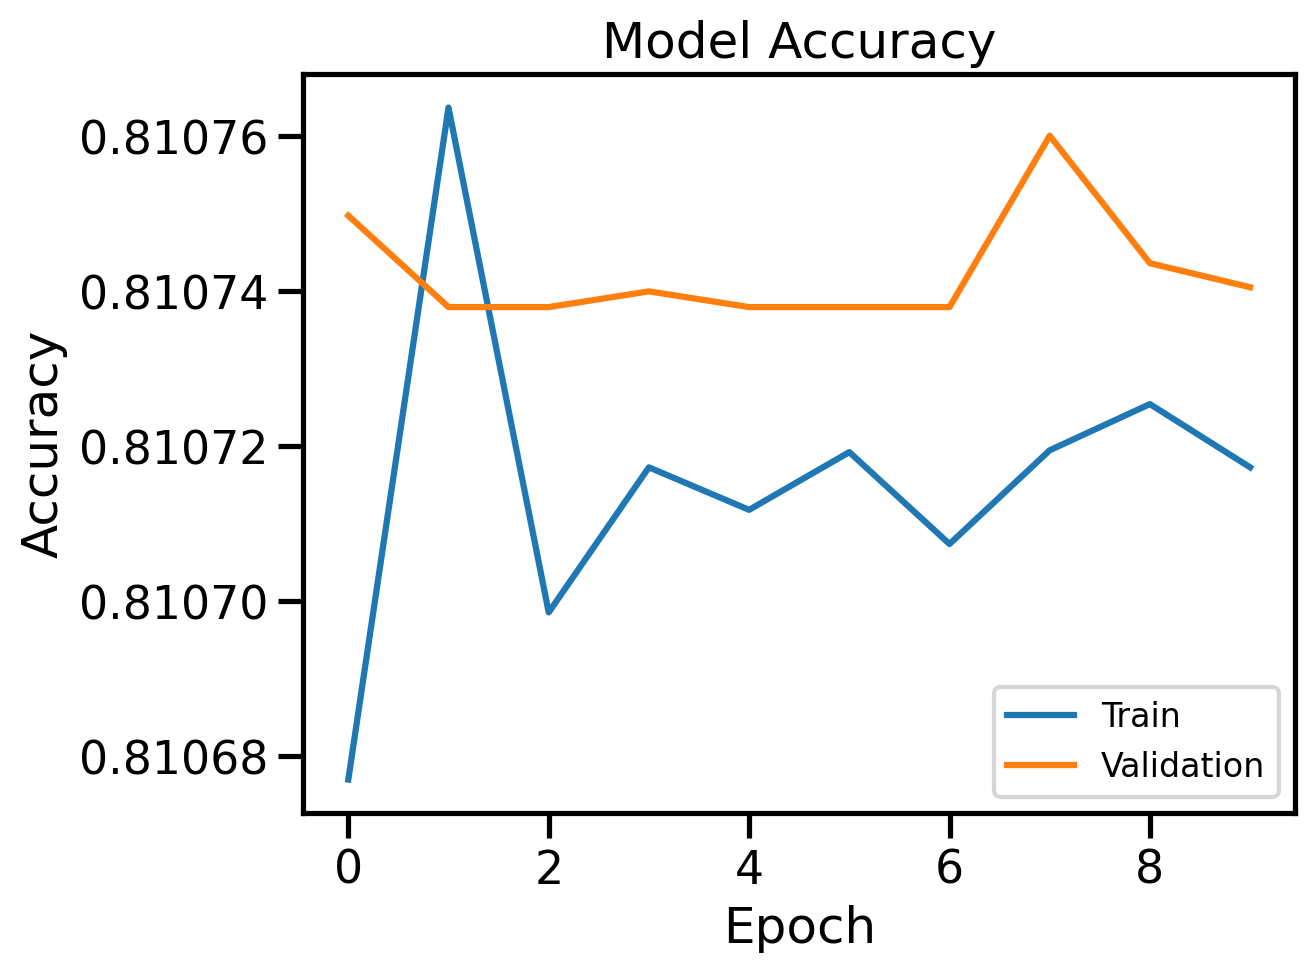

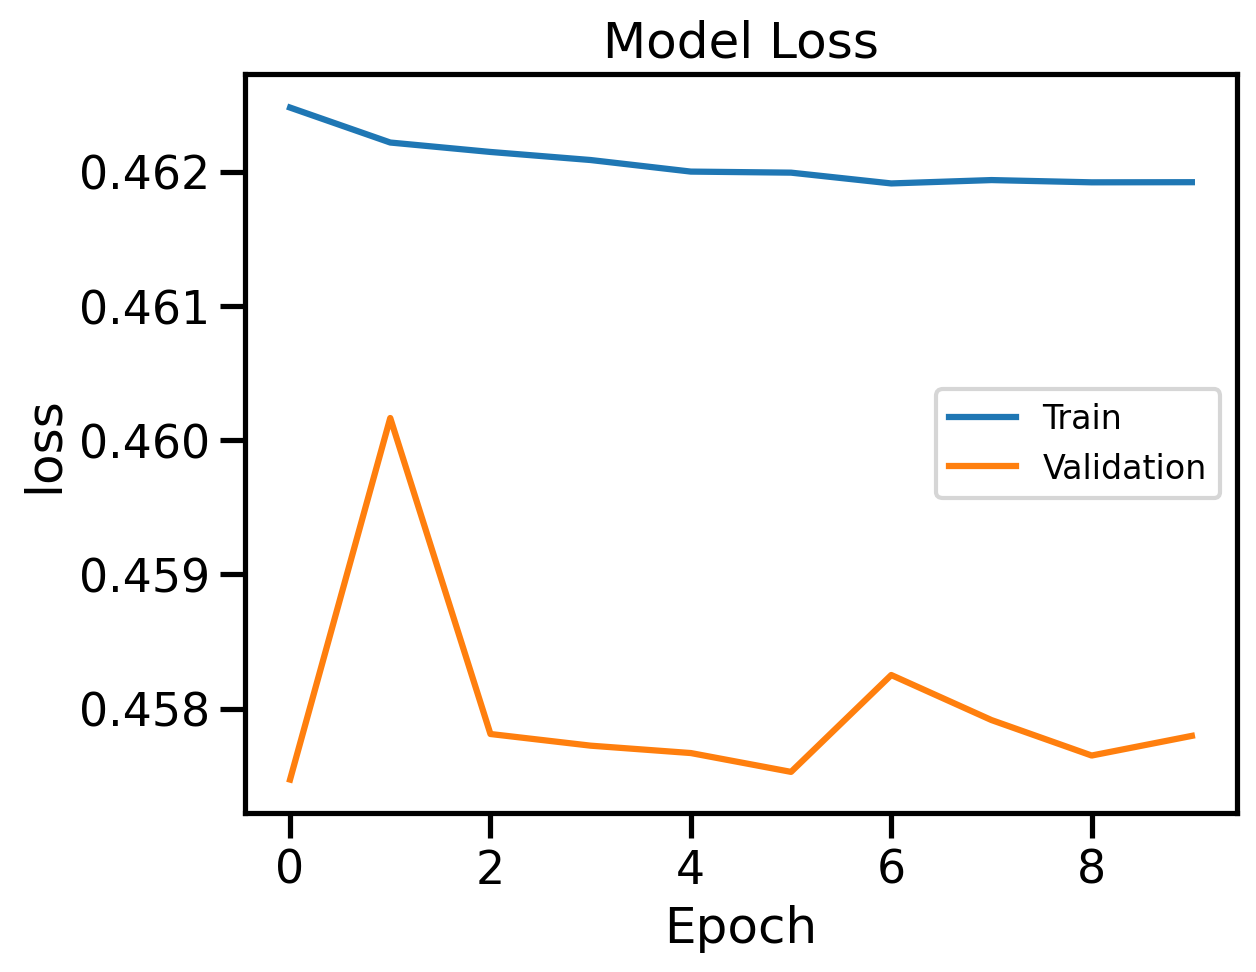

In [28]:
# Compile the model
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_SGD_pca  = model1.fit(X_train_pca, y_train_pca, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test_pca), verbose=2) 
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_SGD_pca) 

In General, All the figures depicts that the validation set has higher accuracy than the training set. Also, the validation loss lower than training set. As Keras models operate in two distinct modes: training and testing. During the training phase, mechanisms like Dropout and L1/L2 weight regularization are activated to prevent overfitting to the training data. Conversely, when in testing mode, these regularization methods are turned off, allowing the model to perform optimally. So the dropout prevents the training accuracy from overfiting, while it achieves this during evaluation(testing). 

The training loss is an average computed over each batch of training data, and since the model is evolving during training, the loss for initial batches in an epoch tends to be higher compared to the latter batches. Conversely, the testing loss for an epoch is calculated using the model's state at the end of that epoch, often resulting in a lower loss.

